## This Dataset is related to Zomato Bangalore Restaurant's

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
zomato = pd.read_csv("zomato.csv")

In [3]:
zomato = pd.DataFrame(zomato)
zomato.columns = [i.lower() for i in zomato.columns]
print("Original DataSet : ",zomato.shape)

Original DataSet :  (51717, 17)


In [4]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
# let's drop uncessary columns
#url,phone,address,reviews_list,menu_item
zomato.drop(["url","phone","address","reviews_list","menu_item","location"],axis = 1,inplace = True)

In [6]:
#let's drop duplicate values from the dataset
zomato = zomato.drop_duplicates()
#after removing the duplicate's from the dataset
zomato.shape

(51593, 11)

In [7]:
# let's see null percentage respect to each column
Null_Value_Percent = pd.DataFrame(zomato.isnull().sum()/len(zomato)*100)
Null_Value_Percent

,0
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.002035
votes,0.000000
rest_type,0.439982
dish_liked,54.267052
cuisines,0.087221
approx_cost(for two people),0.666757
listed_in(type),0.000000


In [8]:
# let's drop null value records from the dataset
zomato.dropna(how = 'any',inplace = True,axis = 0)
# how = 'any', means remove the record if it has atleast one null value .
zomato.shape

(23364, 11)

In [9]:
#let's rename some column's
zomato.rename(columns = {'approx_cost(for two people)':"cost","listed_in(type)":"service_type","listed_in(city)":"city"},inplace = True)
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'cost', 'service_type', 'city'],
      dtype='object')

In [10]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23364 entries, 0 to 51715
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          23364 non-null  object
 1   online_order  23364 non-null  object
 2   book_table    23364 non-null  object
 3   rate          23364 non-null  object
 4   votes         23364 non-null  int64 
 5   rest_type     23364 non-null  object
 6   dish_liked    23364 non-null  object
 7   cuisines      23364 non-null  object
 8   cost          23364 non-null  object
 9   service_type  23364 non-null  object
 10  city          23364 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


# Let's Preprocess Our Feature's

In [11]:
# let's convert type of cost feature in to int type
zomato["cost"] = zomato["cost"].apply(lambda cost : cost.replace(",",""))
zomato["cost"] = zomato["cost"].astype(int)
#zomato["cost"].sample(10)

In [12]:
#cleaning rate column

# let's remove records related to newly opened shop's
new_rating_index = zomato[zomato["rate"]=="NEW"].index
zomato.drop(new_rating_index,axis = 0,inplace = True)
print("Dataset After droping records related to newly opened shop's : ",zomato.shape)

# let's remove /5 from rating(rate) column
zomato["rate"] = zomato["rate"].astype(str)
zomato["rate"] = zomato["rate"].apply(lambda x : x[0:3])
zomato["rate"] = zomato["rate"].astype(float)

Dataset After droping records related to newly opened shop's :  (23218, 11)


## Let's Explore

# univariate analysis

## 1. top 10 Restaurants Type's
 insight : Most of the  restaurant's offering Casual Dinning Service.

Text(0, 0.5, 'count')

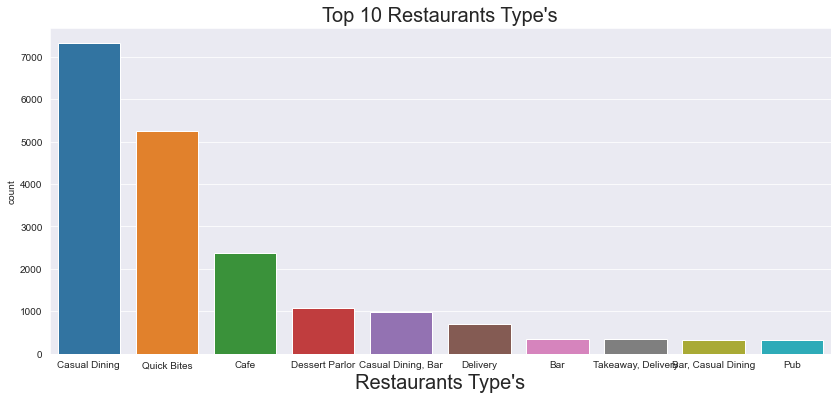

In [13]:
plt.rcParams['figure.figsize'] = (14,6)
top_ten_restaurant_types = zomato.rest_type.value_counts().head(10)
sns.barplot(top_ten_restaurant_types.index,top_ten_restaurant_types)
plt.title("Top 10 Restaurants Type's",fontsize = 20)
plt.xlabel("Restaurants Type's",fontsize = 20)
plt.ylabel("count")

## 2. Top 10 liked dish's 
insight : Biryani is the Most Liked food among all,

Text(0, 0.5, 'count')

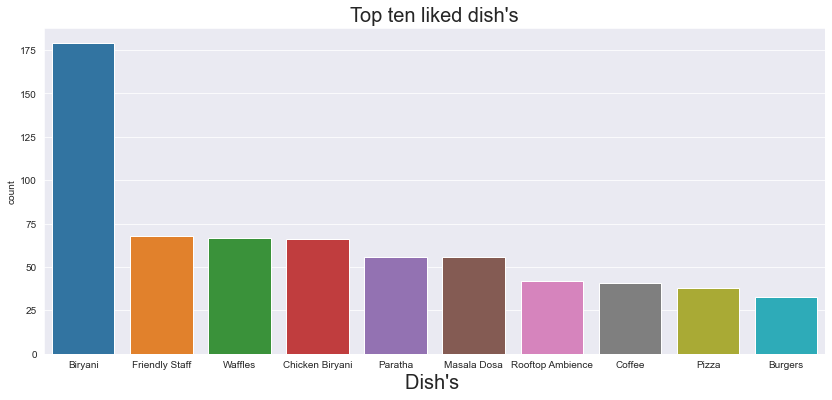

In [14]:
top_ten_liked_dish = zomato.dish_liked.value_counts().head(10)
sns.barplot(top_ten_liked_dish.index,top_ten_liked_dish)
plt.title("Top ten liked dish's",fontsize = 20)
plt.xlabel("Dish's ",fontsize = 20)
plt.ylabel("count")

## 3.Which Food Service Type is  Preferred  by Most Of the Restaurant ?
insight : Most of the Restaurant's prefer's "Delivery" and "Dine-out" as thier Service "

Text(0.5, 1.0, "Food Service Type's ")

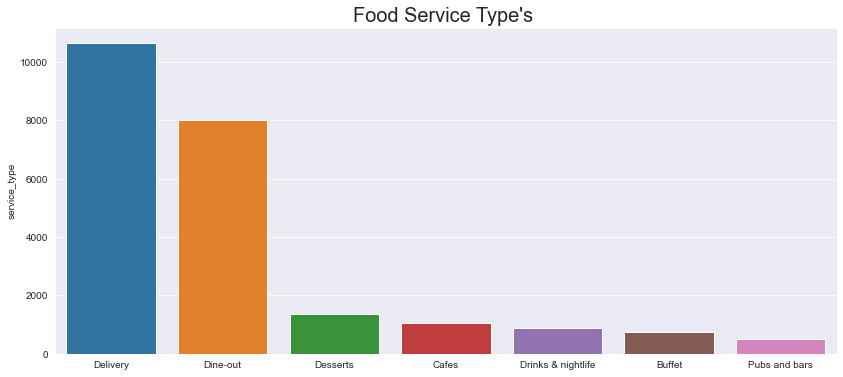

In [15]:
food_service_type = zomato.service_type.value_counts()
sns.barplot(food_service_type.index,food_service_type)
plt.title("Food Service Type's ",fontsize = 20)

## 4.Top Five Cooking Style's Preferred By Restaurant's  ( cuisines )
insight : North indian  (cuisines) cooking style is Prefferred By Most of the Restaurant's .

Text(0, 0.5, 'count')

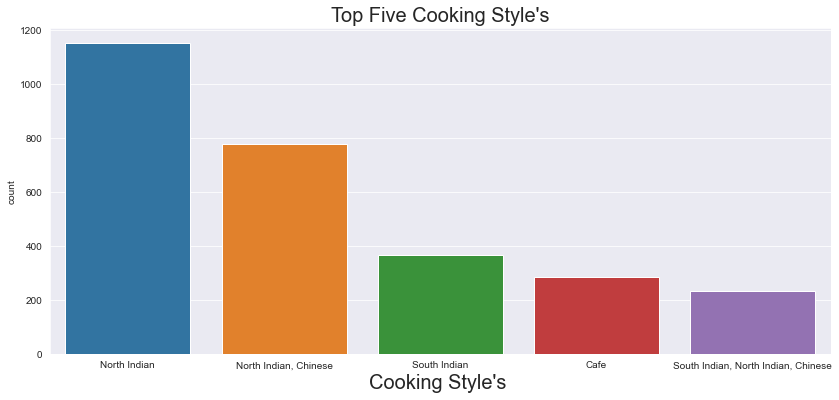

In [16]:
top_five_cooking_style = zomato.cuisines.value_counts().head(5)
sns.barplot(top_five_cooking_style.index,top_five_cooking_style)
plt.title("Top Five Cooking Style's",fontsize = 20)
plt.xlabel("Cooking Style's ",fontsize = 20)
plt.ylabel("count")

## 5.Which City Got More Number of Restaurant's ? (top 5)
insight : Koramangala got more Number of Restaurant's 

In [17]:
# get the city
zomato.city = zomato.city.str.split(" ").str[0] 

Text(0.5, 1.0, "City with More Number of Restaurant's")

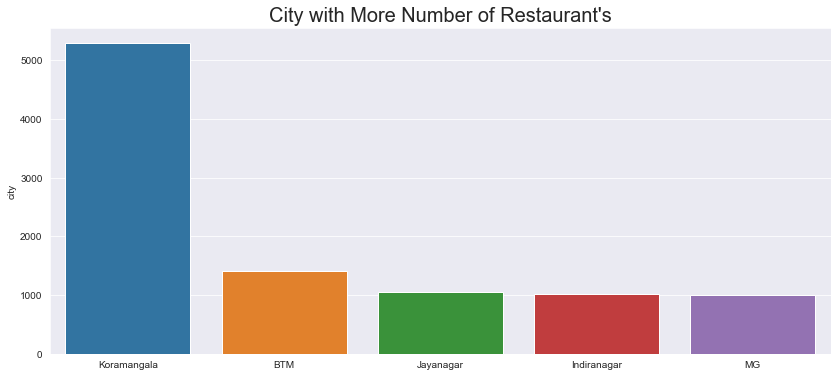

In [18]:
city_rest_count = zomato.city.value_counts().head()
sns.barplot(city_rest_count.index,city_rest_count)
plt.title("City with More Number of Restaurant's",fontsize = 20)

## 6.  Let's see the Distribution Of Cost Column 
insight : Most of the Food Ordered Cost's is in between the range of 1 to 1000

Highest Food Ordered Cost : 6000
Lowest  Food Ordered Cost : 40


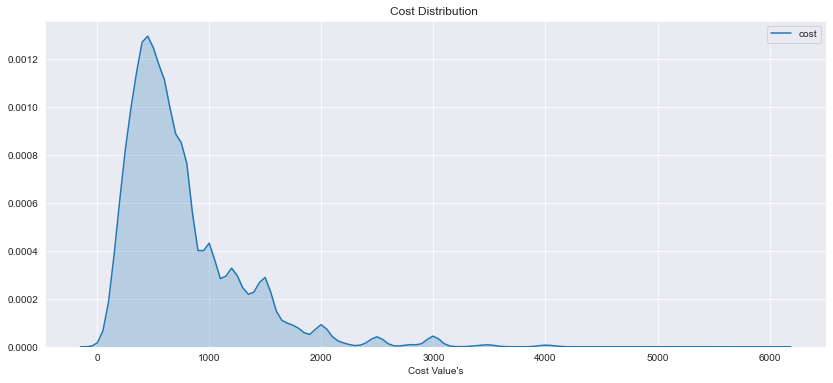

In [19]:
sns.kdeplot(zomato["cost"],shade = True)
plt.title("Cost Distribution ")
plt.xlabel("Cost Value's")
print("Highest Food Ordered Cost :",zomato["cost"].max())
print("Lowest  Food Ordered Cost :",zomato["cost"].min())

# Bivariate Analysis

## 1. what is the  average rating given to the  Restaurant's in a Particular City (top 5  cities with highest rated Restaurant's ) 
insight : Restaurant's present in Chruch Road Location rated highest comapred to others,

Text(0.5, 1.0, "Top 5 cities with highest rated Restaurant's ")

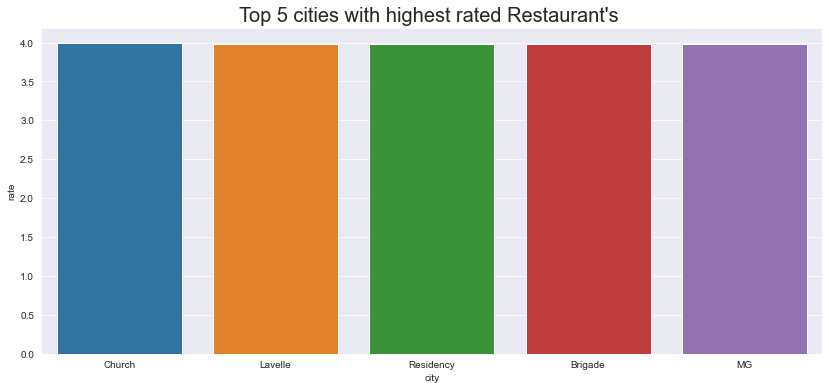

In [20]:
avg_city_rest_rate = pd.pivot_table(zomato,index = ["city"],values = ["rate"])
avg_city_rest_rate = avg_city_rest_rate.sort_values(by = 'rate',ascending = False).head(5)
sns.barplot(avg_city_rest_rate.index,avg_city_rest_rate["rate"])
plt.title("Top 5 cities with highest rated Restaurant's ",fontsize = 20)

## 2. Best Restaurant's in best  Cities (top 5  cities with highest rated Restaurant's )

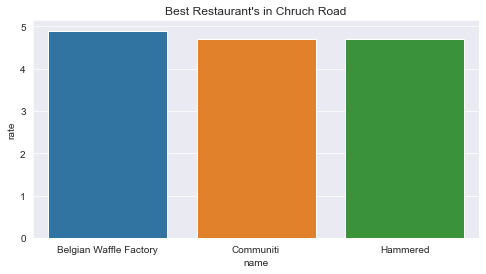

In [21]:
plt.rcParams['figure.figsize'] = (8,4)
top_rest_in_chruch_road = zomato[zomato["city"] == "Church"].sort_values(by = "rate",ascending = False).head(5)
sns.barplot(top_rest_in_chruch_road.name,top_rest_in_chruch_road.rate)
plt.title("Best Restaurant's in Chruch Road")
plt.rcParams['figure.figsize'] = (8,4)

Text(0.5, 1.0, "Best Restaurant's in Residency Road")

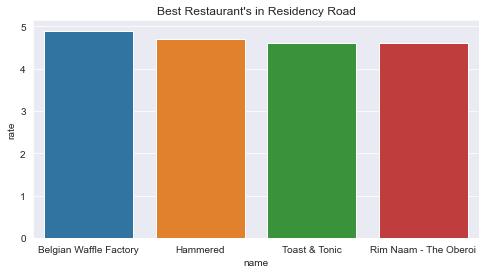

In [22]:
top_rest_in_Residency = zomato[zomato["city"] == "Residency"].sort_values(by = "rate",ascending = False).head(5)
sns.barplot(top_rest_in_Residency.name,top_rest_in_Residency.rate)
plt.title("Best Restaurant's in Residency Road")

Text(0.5, 1.0, "Best Restaurant's in Brigade Road")

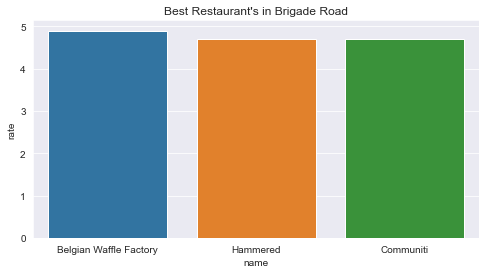

In [23]:
top_rest_in_Brigade = zomato[zomato["city"] == "Brigade"].sort_values(by = "rate",ascending = False).head(5)
sns.barplot(top_rest_in_Brigade.name,top_rest_in_Brigade.rate)
plt.title("Best Restaurant's in Brigade Road")

Text(0.5, 1.0, "Best Restaurant's in MG Road")

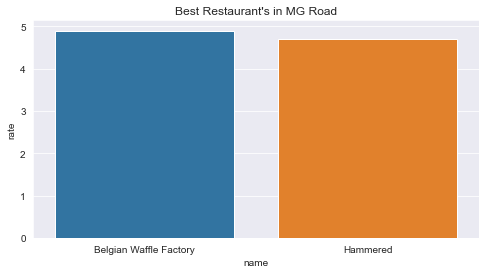

In [24]:
top_rest_in_MG = zomato[zomato["city"] == "MG"].sort_values(by = "rate",ascending = False).head(5)
sns.barplot(top_rest_in_MG.name,top_rest_in_MG.rate)
plt.title("Best Restaurant's in MG Road")

## 3.Top 5 Food price's 

In [25]:
food_with_highest_price = zomato[["dish_liked","cost"]]
food_with_highest_price = food_with_highest_price.drop_duplicates().sort_values(by = "cost",ascending = False ).head(5)
food_with_highest_price

,dish_liked,cost
45618,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...",6000
19139,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...",6000
40266,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...",5000
41591,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...",4500
37715,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...",4100


## 4.What type of Order's do Most of Restaurant's Get (offline v/s online )
insight  : Most of Restaurant's Get online order's 

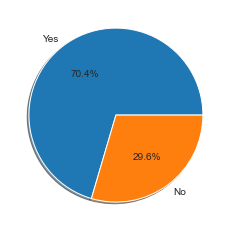

In [26]:
order_type = zomato.online_order.value_counts()
plt.pie(order_type,labels = order_type.index,autopct='%1.1f%%', shadow=True)
plt.show()

## 5. Restaurant with Highest Votes


Text(0, 0.5, 'Number of Votes ')

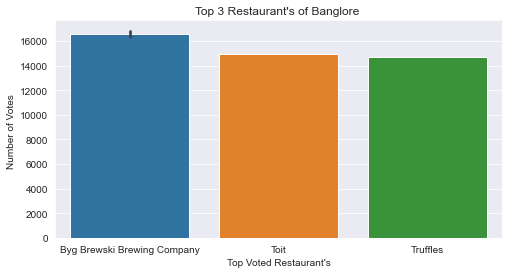

In [27]:
rest_with_highest_votes = zomato[["name","votes"]].drop_duplicates().sort_values(by="votes",ascending = False).head(5)
sns.barplot(rest_with_highest_votes.name,rest_with_highest_votes.votes)
plt.title("Top 3 Restaurant's of Banglore ")
plt.xlabel("Top Voted Restaurant's")
plt.ylabel("Number of Votes ")

## 6.is there any relationship between (votes v/s cost) ?
insight : There is no relationship (votes v/s cost)

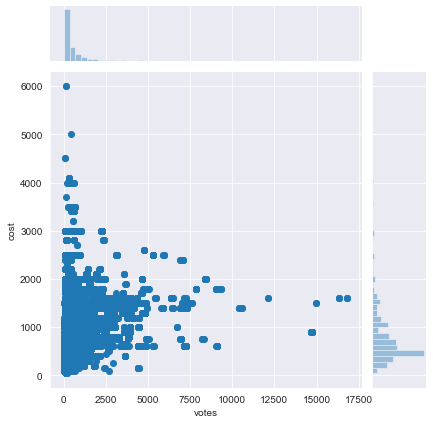

In [28]:
sns.jointplot(zomato["votes"],zomato["cost"])

## 7.let's find best  restaurants
The criteria must be: 
1.cheapest,
2.highly rated,
3.reliable(large number of votes) options

In [29]:
# eg : let's find best restuarant under given criteria for eating 
# Paneer Peri Peri, Pancakes, Fajitas, Sweet Crepe, Peri Peri Chicken, Chicken Breast, Nutella Crepe

In [30]:
#assume restaurant's with greater than 4.5 ratings are best one
high_rated_rest = zomato[zomato["rate"]>4.5]

In [31]:
#assume any one most_liked_dished and compare the result's in order to find cheapest with better quailty
#high_rated_rest.dish_liked.value_counts() #uncomment this to know better
high_rated_cheapprice_rest = high_rated_rest[high_rated_rest["dish_liked"]=="Paneer Peri Peri, Pancakes, Fajitas, Sweet Crepe, Peri Peri Chicken, Chicken Breast, Nutella Crepe"]

In [32]:
# consider Restaurant with Highest vote's 
# assume restaurant's with votes greater than 700 are all good once's,
high_rated_cheapprice_highvotes_rest = high_rated_cheapprice_rest[high_rated_cheapprice_rest["votes"]>700]
best_restuarant = high_rated_cheapprice_highvotes_rest["cost"].min()
high_rated_cheapprice_highvotes_rest[high_rated_cheapprice_highvotes_rest["cost"]==best_restuarant].iloc[:,:]

# below are the best restaurant's for eating ,
# Paneer Peri Peri, Pancakes, Fajitas, Sweet Crepe, Peri Peri Chicken, Chicken Breast, Nutella Crepe

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,service_type,city
8341,Lot Like Crepes,Yes,No,4.7,1022,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Cafes,BTM
9158,Lot Like Crepes,Yes,No,4.7,1022,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Delivery,BTM
10269,Lot Like Crepes,Yes,No,4.6,1028,Dessert Parlor,"Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Desserts, Continental",550,Desserts,BTM
10938,Lot Like Crepes,Yes,No,4.7,1022,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Dine-out,BTM
20230,Lot Like Crepes,Yes,No,4.6,1024,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Delivery,Jayanagar
26568,Lot Like Crepes,Yes,No,4.6,1026,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Cafes,Koramangala
26878,Lot Like Crepes,Yes,No,4.6,1026,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Delivery,Koramangala
28160,Lot Like Crepes,Yes,No,4.6,1026,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Desserts,Koramangala
28463,Lot Like Crepes,Yes,No,4.6,1027,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Dine-out,Koramangala
29652,Lot Like Crepes,Yes,No,4.6,1026,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550,Delivery,Koramangala


## let's see the correlation between the features

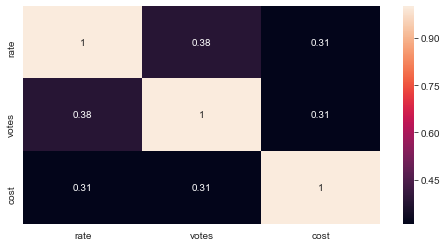

In [33]:
sns.heatmap(zomato.corr(),annot = True)
# feature's are highly correlated

In [36]:
def get_num_for_cat(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

z_fact = get_num_for_cat(zomato.copy())

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
x = z_fact.loc[:,z_fact.columns!="rate"]
y = np.array(z_fact.loc[:,"rate"])

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)

# Linear Regression Model

In [41]:
lr_model =LinearRegression()
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
print("r2_score for Linear Reg model : ",r2_score(ytest,ypred))

r2_score for Linear Reg model :  0.23520810826738492


## RandomForestRegressor

In [42]:
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=43)
rf_model.fit(xtrain,ytrain)
ypred = rf_model.predict(xtest)
r2_score(ytest,ypred)

0.8100799758749725

In [43]:
print("r2_score for RandomForestRegressor model : ",r2_score(ytest,ypred))

r2_score for RandomForestRegressor model :  0.8100799758749725
